In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mvtec-ad/readme.txt
/kaggle/input/mvtec-ad/license.txt
/kaggle/input/mvtec-ad/wood/readme.txt
/kaggle/input/mvtec-ad/wood/license.txt
/kaggle/input/mvtec-ad/wood/ground_truth/hole/000_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/hole/003_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/hole/004_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/hole/005_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/hole/001_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/hole/006_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/hole/008_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/hole/007_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/hole/002_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/hole/009_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/liquid/000_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/liquid/003_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/liquid/004_mask.png
/kaggle/input/mvtec-ad/wood/ground_truth/liquid/005_mask.png
/kaggle/input/mvte

In [2]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt 
#ground truth
len(os.listdir('/kaggle/input/mvtec-ad/screw/ground_truth/manipulated_front'))


24

In [3]:
images = []
for dirc in glob.glob('/kaggle/input/mvtec-ad/hazelnut/train/good/*.png'):
    img = cv2.imread(dirc)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(64,64)).astype('float32')/255
    images.append(img)

x_train = np.array(images)

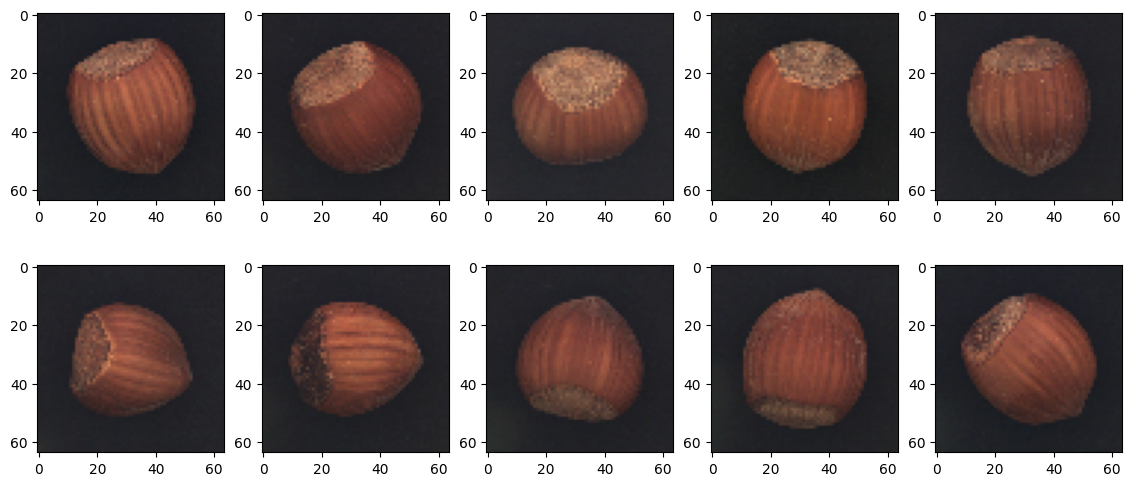

In [4]:
import random
rows, cols = 2, 5
fig=plt.figure(figsize=(14, 6))
for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    image = x_train[random.randrange(x_train.shape[0])]
    plt.imshow(image)
plt.show()



In [5]:
!pip install alibi-detect


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 42.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.25.0
    Uninstalling scikit-image-0.25.0:
      Successfully uninstalled scikit-image-0.25.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
  

In [6]:
from alibi_detect.od import OutlierVAE
from keras.models import Sequential
from keras import layers
LATENT_DIM = 2048
DENSE_DIM = (4, 4, 512)

encoder_net = Sequential([
    layers.InputLayer(x_train.shape[-3:], name='inputs'),

    layers.Conv2D(64,  5, strides=2, padding='same', activation='relu', name='encoder_1'),
    layers.Conv2D(128, 3, strides=2, padding='same', activation='relu', name='encoder_2'),
    layers.Conv2D(256, 3, strides=2, padding='same', activation='relu', name='encoder_3'),
    layers.Conv2D(512, 3, strides=2, padding='same', activation='relu', name='encoder_4'),
])

encoder_net.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_1 (Conv2D)                   │ (None, 32, 32, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_2 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_3 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_4 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,554,048 (5.93 MB)

 Trainable params: 1,554,048 (5.93 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
x_train.shape

(391, 64, 64, 3)

In [8]:
decoder_net = Sequential([
    layers.InputLayer((LATENT_DIM, ), name='inputs'),
    
    layers.Dense(np.prod(DENSE_DIM), name="decoder_dense"),
    layers.Reshape(target_shape=DENSE_DIM, name="decoder_reshape"),
    
    layers.Conv2DTranspose(256, 3, strides=2, padding='same', activation='relu', name='decoder_4'),
    layers.Conv2DTranspose(128, 3, strides=2, padding='same', activation='relu', name='decoder_3'),
    layers.Conv2DTranspose(64,  3, strides=2, padding='same', activation='relu', name='decoder_2'),
    layers.Conv2DTranspose(3,   5, strides=2, padding='same', activation='sigmoid', name='decoder_1'),
])

decoder_net.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_dense (Dense)                │ (None, 8192)                │      16,785,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_reshape (Reshape)            │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_4 (Conv2DTranspose)          │ (None, 8, 8, 256)           │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_3 (Conv2DTranspose)          │ (None, 16, 16, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_2 (Conv2DTranspose)          │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_1 (Conv2DTranspose)          │ (None, 64, 64, 3)           │           4,803 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,338,947 (69.96 MB)

 Trainable params: 18,338,947 (69.96 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
THRESHOLD = 0.002

od = OutlierVAE(
    threshold=THRESHOLD,
    encoder_net=encoder_net,
    decoder_net=decoder_net,
    latent_dim=LATENT_DIM,
    samples=10
)

In [10]:
od.fit(x_train, epochs=20, batch_size=32, verbose=True)

13/13 ━ 6s 166ms/step - loss_ma: 145337.6128
13/13 ━ 2s 144ms/step - loss_ma: 3289.4150
13/13 ━ 2s 147ms/step - loss_ma: -6935.0262
13/13 ━ 2s 145ms/step - loss_ma: -12326.4008
13/13 ━ 2s 145ms/step - loss_ma: -15375.0980
13/13 ━ 2s 144ms/step - loss_ma: -17669.5214
13/13 ━ 2s 145ms/step - loss_ma: -18316.3503
13/13 ━ 2s 147ms/step - loss_ma: -18619.6217
13/13 ━ 2s 146ms/step - loss_ma: -19034.9805
13/13 ━ 2s 147ms/step - loss_ma: -18328.0952
13/13 ━ 2s 144ms/step - loss_ma: -19054.0362
13/13 ━ 2s 144ms/step - loss_ma: -19571.6842
13/13 ━ 2s 147ms/step - loss_ma: -19307.3697
13/13 ━ 2s 145ms/step - loss_ma: -19101.2730
13/13 ━ 2s 151ms/step - loss_ma: -19314.2020
13/13 ━ 2s 147ms/step - loss_ma: -19302.7233
13/13 ━ 2s 144ms/step - loss_ma: -19461.2170
13/13 ━ 2s 144ms/step - loss_ma: -19491.2618
13/13 ━ 2s 147ms/step - loss_ma: -19276.6548
13/13 ━ 2s 143ms/step - loss_ma: -19440.7751


In [11]:
images = []
for dirc in glob.glob('/kaggle/input/mvtec-ad/hazelnut/test/good/*.png'):
    img = cv2.imread(dirc)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(64,64)).astype('float32')/255
    images.append(img)

x_test = np.array(images)

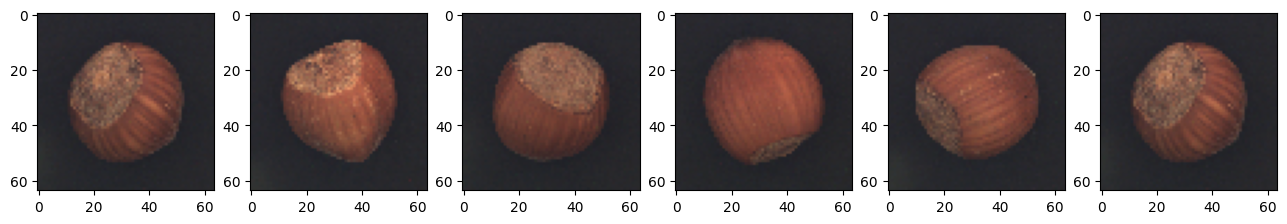

In [12]:
rows, cols = 1, 6
fig=plt.figure(figsize=(16, 3))
for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    image = x_test[random.randrange(x_test.shape[0])]
    plt.imshow(image)
plt.show()

In [13]:
x_pred = od.predict(x_test)


In [14]:
outliers = x_pred['data']['is_outlier']
print(f"Correctly predicted: {(outliers == 0).sum() / len(outliers):.00%}"   )

Correctly predicted: 65%


In [15]:
images, masks = [],[]
pathname = os.path.join('/kaggle/input/mvtec-ad/hazelnut', 'test', 'crack', '*.png')

for path in glob.glob(pathname):
    image = cv2.imread(path,flags=cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(64,64)).astype('float32')/255.0
    images.append(image)

    fname = os.path.splitext(os.path.basename(path))[0]
    mask = cv2.imread(os.path.join('/kaggle/input/mvtec-ad/hazelnut/ground_truth','crack',f"{fname}_mask.png"),flags=cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask,(64,64)).astype('float32')/255.0
    masks.append(mask)

x_test,x_truth = np.array(images),np.array(masks)

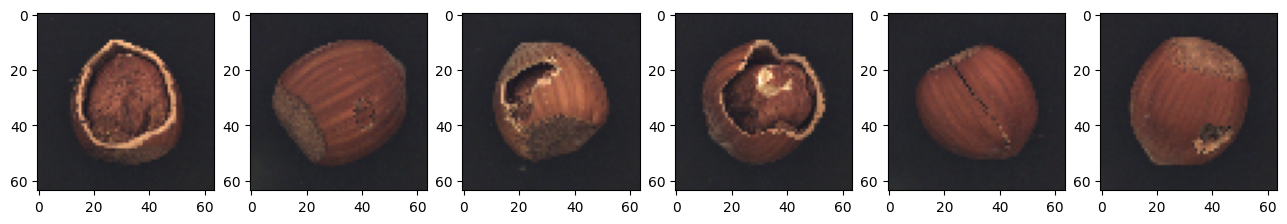

In [16]:
rows, cols = 1, 6
fig=plt.figure(figsize=(16, 3))
for i, ind in enumerate(random.sample(range(x_test.shape[0]), rows * cols)):
    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(x_test[ind])
plt.show()



In [17]:
x_pred = od.predict(x_test)

In [18]:


outliers = x_pred['data']['is_outlier']
print(f"Correctly predicted: {(outliers == 1).sum() / len(outliers):.00%}")



Correctly predicted: 83%


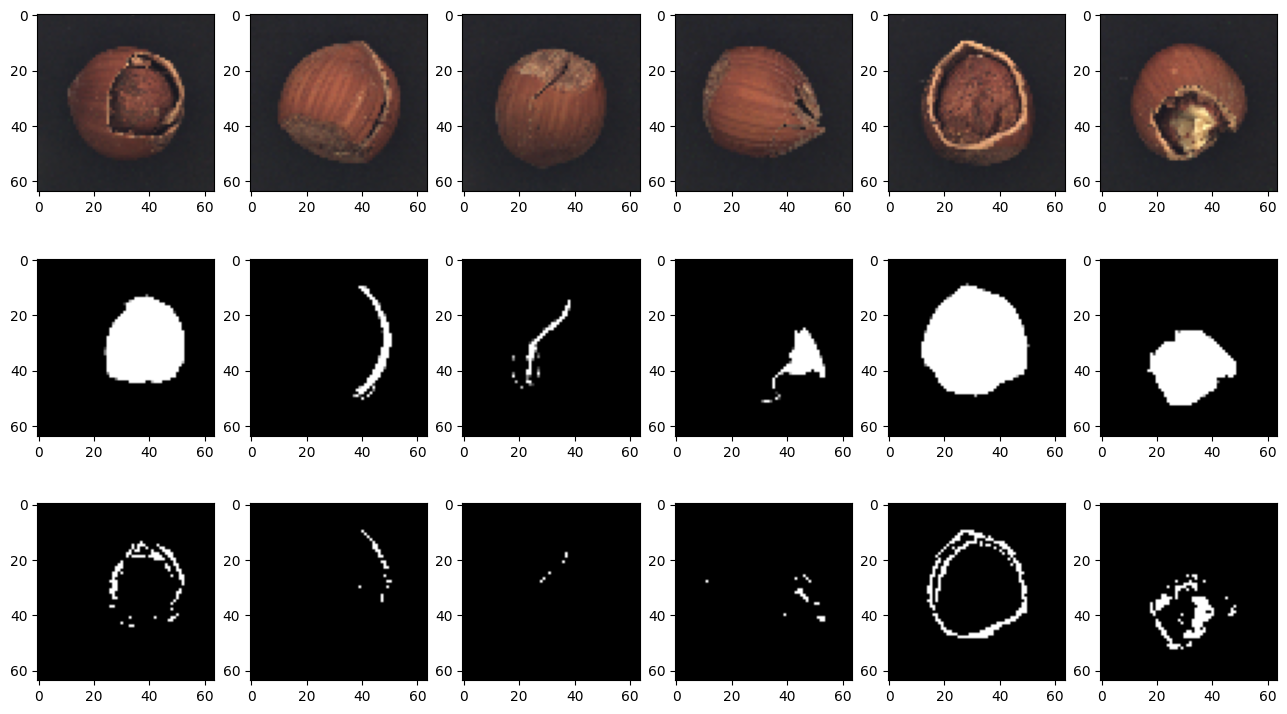

In [19]:
rows, cols = 3, 6
fig=plt.figure(figsize=(16, 9))

for i, ind in enumerate(random.sample(sorted(np.where(x_pred['data']['is_outlier'] == 1)[0]), cols)):
    fig.add_subplot(rows, cols, i + 1)

    image = x_test[ind]
    plt.imshow(image)
    
    fig.add_subplot(rows, cols, i + cols + 1)
    image = x_truth[ind]
    plt.imshow(image, cmap='gray')    
    
    fig.add_subplot(rows, cols, i + 2 * cols + 1)
    image = x_pred['data']['feature_score'][ind]
    image = np.linalg.norm(image, axis=-1, keepdims=True)
    image = (image >= 0.1).astype(np.uint16)
    plt.imshow(image, cmap='gray')    

plt.show()